Compare the true abundance of e, C+, H+, H2, CO to the abundance from analytic functions. G0=1. CR=1e-18

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
from slab import SlabOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

In [2]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"
slab = SlabOut(dir_out+"out_Z0p5/", Zd=0.5) 
slab.ReadRates()
slab.ReadThermo()

Set xC=8.00e-05, xO=1.60e-04.
Calculating E assuming CvCold and xHe=0.1 ...


In [3]:
G0 = 1.
xi_CR = 1.0e-16
Zd = 0.5

/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:2512: UserWarning: AutoMinorLocator does not work with logarithmic scale
  warnings.warn('AutoMinorLocator does not work with logarithmic '
/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


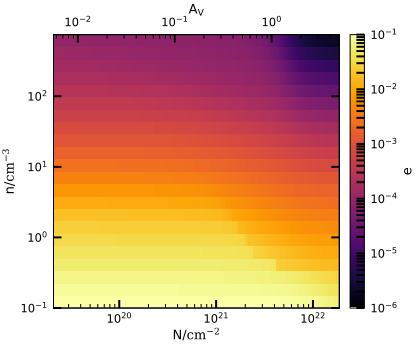

In [4]:
plot_chem.plot_abd(slab, "e", norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [26]:
fe = np.zeros(slab.nHM.shape)
#fe_iter = np.zeros(slab.nHM.shape)
#niter = np.zeros(slab.nHM.shape)
#GPE = G0*np.exp(-1.87*slab.NHM*Zd/1.87e21)
#GCI = G0*np.exp(-3.76*slab.NHM*Zd/1.87e21)
for i in xrange(slab.nHM.shape[0]):
    for j in xrange(slab.nHM.shape[1]):
        fe[i, j] = cu.fe(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j], kcr=xi_CR, Zd=Zd)
        #fe_iter[i, j], niter[i, j] = cu.fe_iter(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
        #                                        kcr=xi_CR, Zd=Zd)

cooling_utils.py:35: RuntimeWarning: divide by zero encountered in double_scalars
  psi_gr = 1.7 * G_PE * np.sqrt(T)/(nH * x_e)
cooling_utils.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  x_Hplus = c/(k_Hplus_e *  x_e + k_Hplus_gr)
cooling_utils.py:50: RuntimeWarning: divide by zero encountered in double_scalars
  psi_gr = 1.7 * G_PE * np.sqrt(T)/(nH * x_e)


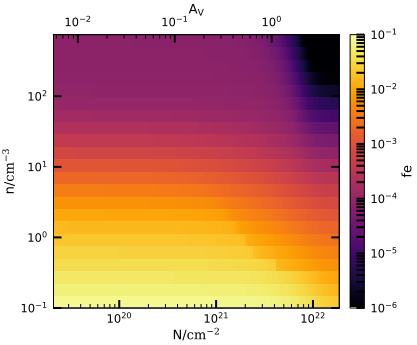

In [28]:
plot_chem.plot_abd(slab, "fe", plot_field=fe, norm=LogNorm(), vmax=0.1, vmin=1e-6)

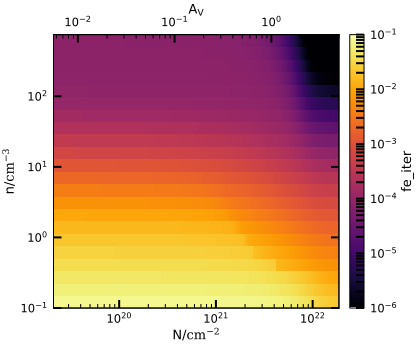

In [7]:
plot_chem.plot_abd(slab, "fe_iter", plot_field=fe_iter, norm=LogNorm(), vmax=0.1, vmin=1e-6)

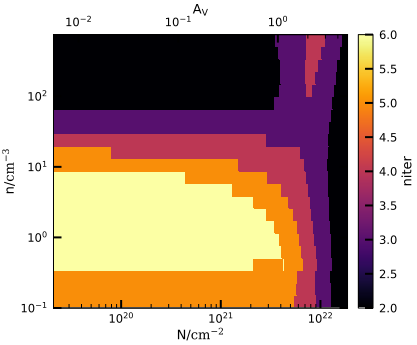

In [8]:
plot_chem.plot_abd(slab, "niter", plot_field=niter)

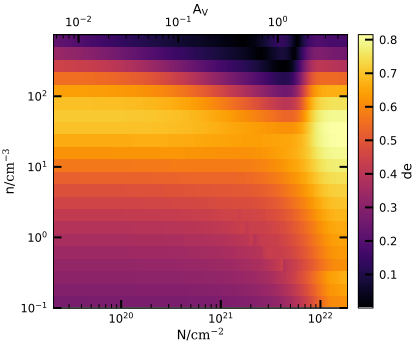

In [27]:
de = abs(fe_iter - slab.abd["e"])/(slab.abd["e"]+1e-5)
plot_chem.plot_abd(slab, "de", plot_field=de)

In [29]:
fHplus_e = cu.fHplus_e(fe, slab.nHM, slab.abd["T"], GPE, kcr=xi_CR, Zd=Zd)
fCplus_e = cu.fCplus_e(fe, slab.nHM, slab.abd["T"], GPE, GCI, kcr=xi_CR, Zd=Zd)

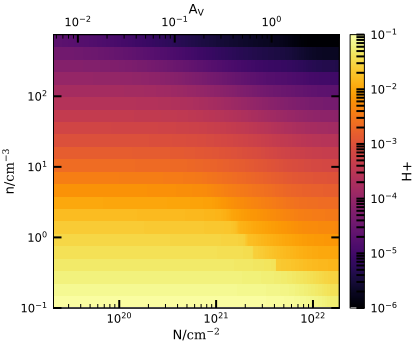

In [11]:
plot_chem.plot_abd(slab, "H+", norm=LogNorm(), vmax=0.1, vmin=1e-6)

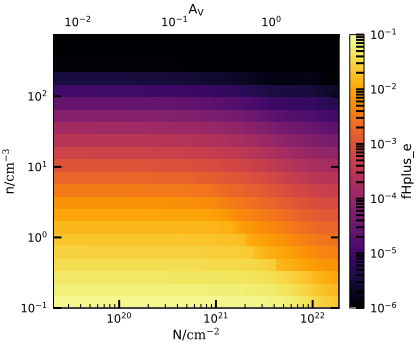

In [30]:
plot_chem.plot_abd(slab, "fHplus_e", plot_field=fHplus_e, norm=LogNorm(), vmax=0.1, vmin=1e-6)

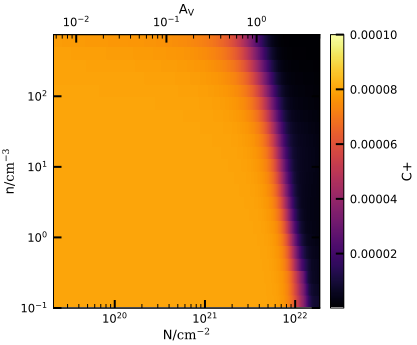

In [31]:
plot_chem.plot_abd(slab, "C+", vmax=1e-4)

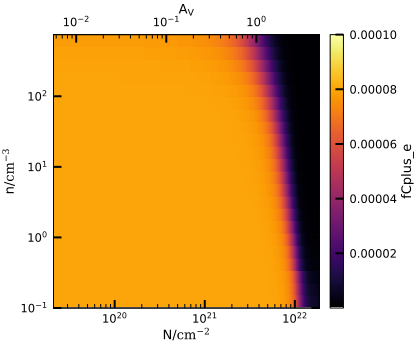

In [32]:
plot_chem.plot_abd(slab, "fCplus_e", plot_field=fCplus_e, vmax=1e-4)

In [16]:
fH2_cr = cu.fH2_CR(slab.nHM, kcr=xi_CR, Zd=Zd)
fH2_cr_FUV = cu.fH2_CR_FUV(slab.nHM, slab.NHM, G0, kcr=xi_CR, Zd=Zd)

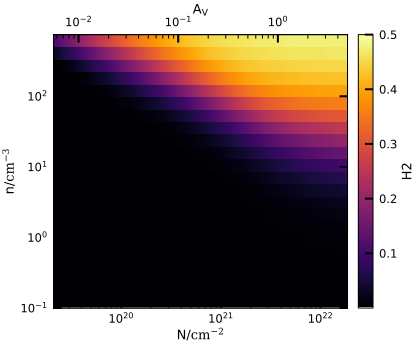

In [17]:
plot_chem.plot_abd(slab, "H2", vmax=0.5)

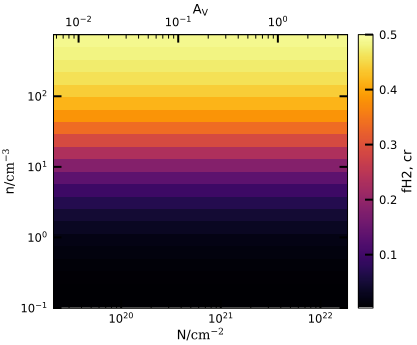

In [18]:
plot_chem.plot_abd(slab, "fH2, cr", vmax=0.5, plot_field=fH2_cr)

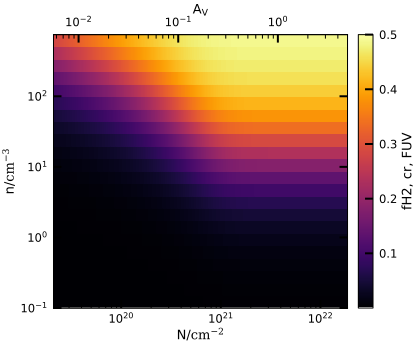

In [19]:
plot_chem.plot_abd(slab, "fH2, cr, FUV", vmax=0.5, plot_field=fH2_cr_FUV)

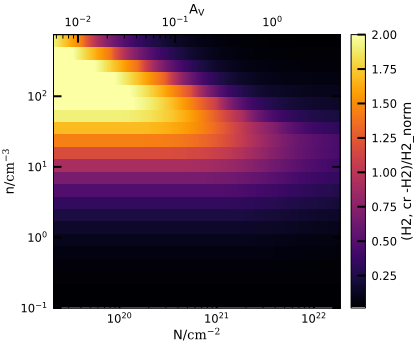

In [20]:
H2_min = 0.2
H2_norm = np.zeros(slab.abd["H2"].shape) + H2_min
indx = slab.abd["H2"] > H2_min
H2_norm[indx] = slab.abd["H2"][indx]
plot_chem.plot_abd(slab, "(H2, cr -H2)/H2_norm", vmax=2, plot_field=(fH2_cr-slab.abd["H2"])/H2_norm)

In [21]:
GCO = G0*np.exp(-3.88*slab.NHM*Zd/1.87e21)
fCO = cu.fCO(slab.nHM, fCplus_e, fH2_cr, GCO, kcr=xi_CR, Zd=Zd)
fCO_FUV = cu.fCO(slab.nHM, fCplus_e, fH2_cr_FUV, GCO, kcr=xi_CR, Zd=Zd)

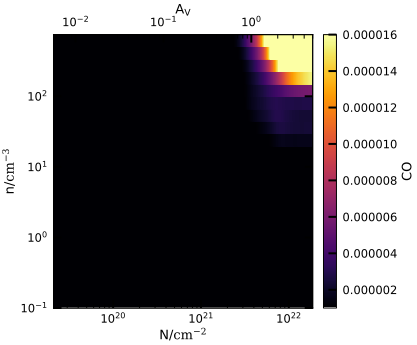

In [22]:
plot_chem.plot_abd(slab, "CO", vmax=1.6e-5, vmin=1e-6)

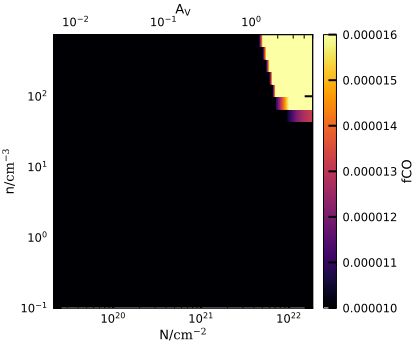

In [23]:
plot_chem.plot_abd(slab, "fCO", plot_field=fCO, vmax=1.6e-5, vmin=1e-5)

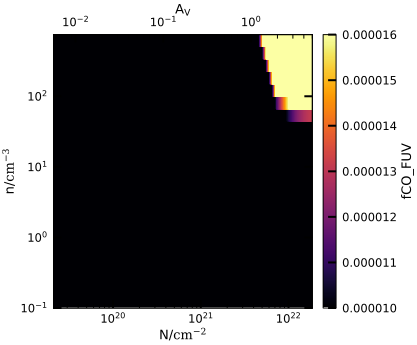

In [24]:
plot_chem.plot_abd(slab, "fCO_FUV", plot_field=fCO_FUV, vmax=1.6e-5, vmin=1e-5)

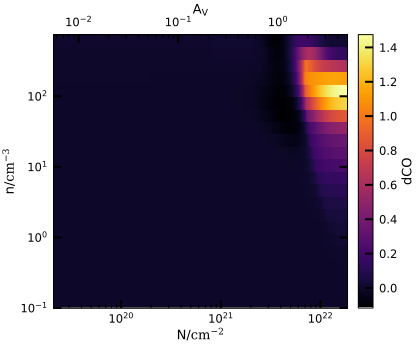

In [25]:
dCO = (fCO-slab.abd["CO"])/(slab.abd["CO"]+1e-5)
plot_chem.plot_abd(slab, "dCO", plot_field=dCO)